Label Pair Graph Kernels are proposed [On Graph Kernels:
Hardness Results and Efficient Alternatives](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.152.8681&rep=rep1&type=pdf)


*   **Kernels based on label pairs**

      *  Derivation of Kernel
      *  Implementation and Illustartion of the Kernel 
      *  Doing Graph Classificaiton on MUTANG dataset using Label Pair Kernel

*   **Kernels based on contiguous label sequences**
      *  contiguous label sequences and direct products 
      *  Implementation and Illustration of the Kernel
      *  Doing Graph Classification on MUTANG dataset using contiguous label sequences

*    **Comparision of both kernels**
*     **Doing Graph Classification on Large Datasets**
*     **Seeing if Multiple Cores and Sparsity helps in Speeding up**





#**Kernels based on Label Pairs**

let $w \in \mathcal{W}_{n}(G)$ denote the set of all possible walks with $n$ edges in $G$ and $\lambda$ be a sequence $\lambda_{0},\lambda_{1} , \dots $ of weights $\lambda_{n} \geq 0 $ for all $n \in \mathbb{N}$. for a given walk $w \in \mathcal{W}_{n}(G)$. let $l_{1}(w)$ denote the label of the first vertex and $l_{n+1}(w)$ denote the label of the last vertex of the walk.

The label pair feature space is defined by one feature $\phi_{\ell_{i} , \ell_{j}}$ for each pair of the labels $\ell_{i}̣,\ell_{j}$

$$ \begin{align*}  \phi_{\ell_{i},\ell_{j}}(G) &= \sum_{n=0}^{\infty} \lambda_n . \text{number of walks of length $n$ that start with vertex which has label i and end with vertex which has label j} \\
&= \sum_{i=0}^{\infty}  \lambda_{n} . |\{ w \in \mathcal{W}_{n}(G) : l_{1}(w) = \ell_i \land l_{n+1}(w) = \ell_{j} \}| 
\end{align*} $$

Now, 


$$ \begin{align*} K(G,G')&= \left < \phi(G) , \phi(G') \right > \\
&= \sum_{\ell_{i} , \ell_{j}} \left[ \sum_{n=0}^{\infty} \lambda_{n}  |\{ w \in \mathcal{W}_{n}(G) : l_{1}(w) = \ell_i \land l_{n+1}(w) = \ell_{j} \}| \,.\ \sum_{m=0}^{\infty} \lambda'_ {m}|\{ w \in \mathcal{W}_{m}(G') : l_{1}(w) = \ell_i \land l_{n+1}(w) = \ell_{j} \}| \right]  \\
&= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty}  \left[ \sum_{\ell_i, \ell_j} \lambda_{n} \lambda_{m}' |\{ w \in \mathcal{W}_{n}(G) : l_{1}(w) = \ell_i \land l_{n+1}(w) = \ell_{j} \}|. |\{ w \in \mathcal{W}_{m}(G') : l_{1}(w) = \ell_i \land l_{n+1}(w) = \ell_{j} \}|  \right] \\
&= \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \sum_{\ell_i,\ell_j} \lambda_{n} (LE^nL^{T})_{ij}. \lambda_{m} (L'E'^{n}L'^{T})_{ij} \\
&=  \sum_{n=0}^{\infty} \sum_{m=0}^{\infty} \left<L (\lambda_{n}E^n)L^{T},L'(\lambda_{m}E'^{m})L'^{T}\right> \\
&= \left< \sum_{n=0}^{\infty}  L (\lambda_{n}E^n)L^{T}, \sum_{m=0}^{\infty} L'(\lambda_{m}E'^{m})L'^{T}\right> \\
&= \left<  L \left(\sum_{n=0}^{\infty}  \lambda_{n}E^n \right)L^{T},  L'\left(\sum_{n=0}^{\infty} \lambda_{n}E'^{n}\right)L'^{T} \right> \\
\end{align*}$$



In [ ]:
#install python-igraph : we use IGraph for manipulating and storing graph data
#install cairocffi : needed for ploting for python-igraph

!pip install python-igraph
!pip install cairocffi

     |████████████████████████████████| 3.2MB 5.3MB/s 
     |████████████████████████████████| 71kB 3.2MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-cp37-none-any.whl size=89548 sha256=2d2929ee98f057fda6b226ecc06a8c674513761d29228a7cc5bfaabaef71171e
  Stored in directory: /root/.cache/pip/wheels/40/76/48/f1effadceea83b32e7d957dd0f92db4db8b537d7b72b4ef374
Successfully built cairocffi


In [ ]:
import os
import platform
import numpy as np
import igraph as ig
from tqdm import tqdm
from sklearn.svm import SVC
import multiprocessing as mp
from numpy import linalg as LA
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from IPython.core.display import display, Image
from itertools import combinations,combinations_with_replacement

In [ ]:
print("Python Version: ", platform.python_version())
print("Number of processors: ", mp.cpu_count())

Python Version:  3.7.10
Number of processors:  2


In [ ]:
#mounting the data  on drive 

from google.colab import drive
drive.mount('/content/drive')
path = 'data/graph_data'

Mounted at /content/drive


In [ ]:
#retreving the file names

def get_data(path):
  graph_files = []
  for file in os.listdir(path):
    if file.endswith('gml'):
        graph_files.append(os.path.join(path,file))
  graph_files.sort()
  return graph_files
  

In [ ]:
# making sure that multiple igraph plots are shown in single jupyter cell

def plot(G,id,plt_dims=(200,200)):
  print("Graph "+id,end= "\n\n")
  ig.plot(G,bbox = plt_dims).save('temporary.png') 
  display(Image(filename='temporary.png'))
  os.remove('temporary.png')

Graph G1



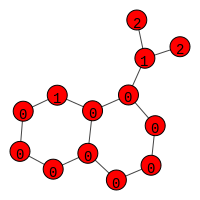

Graph G2



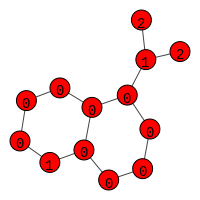

In [ ]:
#sample graph visualization

path = '/content/drive/MyDrive/data/graph_data/MUTAG'
graph_files = get_data(path)
G0 = ig.read(graph_files[1])
G1 = ig.read(graph_files[2])
plot(G0,"G1")
plot(G1,"G2")

Label Matrix $\text{L}$ is of size $|\mathcal{L}| \times |\mathcal{V}|$ where $|\mathcal{L}|$ is number of unique labels. 

In [ ]:
#read all .gml files as Igraph objects

def get_Gs(path):
  graph_files = get_data(path)
  Gs = []
  for graph_file in tqdm(graph_files):
    g = ig.read(graph_file)
    Gs.append(g)
  return Gs  



In [ ]:
#scan through all graphs and find total number of unique labels

def get_sizeof_L(graphs):
  """
  Parameters 
  graphs : list of Igraph objects
  Returns 
  sizeof_L : int 
  """

  n_Gs = len(graphs)
  G_node_labels = list()
  for g in graphs:
    g_node_labels = g.vs['label']
    G_node_labels.extend(g_node_labels)
  sizeof_L = len(set(G_node_labels))
  return sizeof_L  



In [ ]:
mutang_path = '/content/drive/MyDrive/data/graph_data/MUTAG'
Gs = get_Gs(mutang_path)
sizeof_L = get_sizeof_L(Gs)
print(" Number of unique labels : ",sizeof_L)

100%|██████████| 188/188 [00:51<00:00,  3.66it/s]

 Number of unique labels :  7


In [ ]:
# builds the label matrix for Igraph g

def get_labelmat(g,sizeof_L):
  L_g = np.zeros((sizeof_L,g.vcount()))
  g_labels = g.vs['label']
  for i,l_r in enumerate(g_labels):
    r = int(l_r)
    if L_g[r][i] == 0. :
      L_g[r][i] = 1
  return L_g  
  

In [ ]:
print("Label Matrix L for Graph G0: ")
L_G0  = get_labelmat(G0,sizeof_L)
print(L_G0,end= "\n\n")
print("Label Matrix L for Graph G1: ")
L_G1  = get_labelmat(G1,sizeof_L)
print(L_G1,end= "\n\n")
print("Label Matrix L for Graph G0: ")
E_G0  = np.asarray(G0.get_adjacency().data)
print(E_G0,end= "\n\n")
print("Label Matrix L for Graph G1: ")
E_G1  = np.asarray(G1.get_adjacency().data)
print(E_G1,end= "\n\n")

Label Matrix L for Graph G0: 
[[0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Label Matrix L for Graph G1: 
[[0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Label Matrix L for Graph G0: 
[[0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0]

###**Sufficient Condition for convergence of summation of matrix powers**

Note that If $E$ is adjacency matrix, then $\displaystyle \sum_{i=0}^{\infty} \gamma^i E^i$ converges iff $\gamma < \frac{1}{\text{max_degree}(G)}$ 

hence we can set  weight sequence $\lambda_n = \left[\frac{1}{\text{max_degree}(G)} - \epsilon  \right]^{n}$ for small $\epsilon$ and $\displaystyle \sum_{n=0}^{\infty} \lambda_n E^n$ would converge to $\left(I - \gamma. E\right)^{-1}$

In [ ]:
#find the Delta(G) (which is maximum degree)

def get_matpow(g,eps=0.001):
  max_deg = g.maxdegree()
  gamma = 1/max_deg - eps
  I = np.eye(g.vcount()) 
  E = np.asarray(g.get_adjacency().data)
  matpow = LA.inv(I - gamma*E)
  return matpow

In [ ]:
#calculating feature representation of Graph using label pair 

def get_features(g):
  L  = get_labelmat(g,sizeof_L)
  mat_pow_sum = get_matpow(g)
  feature_matrix = L @ mat_pow_sum @ L.T 
  features = feature_matrix.ravel()
  return features

  

In [ ]:
# computes the features for pair of graphs and computes inner product

def K(g1,g2):
  features_g0 = get_features(g1)
  features_g1 = get_features(g2)
  K = np.dot(features_g0, features_g1)
  return K 

In [ ]:
# builds kernel matrix for list of graphs

def kernel_mat(graphs):
  N_gs = len(graphs)
  Kernel = np.zeros((N_gs,N_gs))
  for i,j in tqdm(combinations_with_replacement(range(N_gs),2)):
    Kernel[i][j] = Kernel[j][i] = K(graphs[i],graphs[j])
  return Kernel  



In [ ]:
# Does Graph Classification and returns Accuracy

def graph_classification(Kernel_train,Kernel_test,y_train,y_test):
  clf = SVC(kernel='precomputed')
  clf.fit(Kernel_train,y_train)
  y_pred = clf.predict(Kernel_test)
  acc  = accuracy_score(y_test,y_pred)
  return acc

In [ ]:
# Does StratifiedKFold split and returns Avg Accuracy score

def use_k_fold(Kernel,labels,n_splits):

  skf = StratifiedKFold(n_splits=n_splits, shuffle=True)
  acc_scores = list()
  for train_idx,test_idx in skf.split(Kernel,labels):
    
    Kernel_train = Kernel[train_idx][:, train_idx]
    Kernel_test  = Kernel[test_idx][:,train_idx]
    y_train = labels[train_idx]
    y_test  = labels[test_idx]
    fold_score = graph_classification(Kernel_train,Kernel_test,y_train,y_test)
    acc_scores.append(fold_score)

  avg_acc_score = np.mean(acc_scores)
  return avg_acc_score  


In [ ]:
label_file = os.path.join(mutang_path, 'Labels.txt')
labels = np.loadtxt(label_file)

In [ ]:
print(len(Gs))
Kernel = kernel_mat(Gs)

165it [00:00, 1649.33it/s]

188


17766it [00:10, 1618.86it/s]


In [ ]:
n_splits = 5
avg_acc_score = use_k_fold(Kernel,labels,n_splits)
print("classification accuracy :" , avg_acc_score)

classification accuracy : 0.8772403982930299


#**Contiguous Label Sequence Kernel**


let $\mathcal{S}_n$ denote the set of all possible label sequences of walks with $n$ edges and $\lambda$ be sequence of weights. let $\mathcal{W}_n(G)$ denote the set of all possible walks with $n$ edges in graph $G$. for a given walk $w \in \mathcal{W}_{n}(G)$  let $l_{i}(w)$ denote the i-th label of the walk. 

The sequence feature space is defined by one features for each possible label sequence. In particular, for any given length $n$ and label sequence $s_1,s_2,\dots,s_{2n+1}$, the corresponding featuer value for every graph $\mathcal{G}$ is 

$$\begin{align} \phi_{s}(G) &= \sqrt{\lambda_{s}(G)} |\{ w \in \mathcal{W}_{n}(G), \forall i : s_{i} = \ell_{i}(w)\}|
\end{align}$$


we denote the direct product of graphs $G_1$ and $G_2$ is denoted as $G_1 \times G_2$. vertex set and edge set of $G_1 \times G_2$ is defined as follows 

$$
\begin{align} \mathcal{V}(G_1 \times G_2)&= \{ (v_1,v_2)  \in \mathcal{V}_1 \times \mathcal{V}_2 : \text{label}(v_1) = \text{label}(v_2) \} \\
\mathcal{E}(G_1 \times G_2) &= \{ ((u_1,u_2),(v_1,v_2)) \in \mathcal{V}^2(G_1 \times G_2) : (u_1,v_1) \in \mathcal{E}(G_1) , (u_2,v_2) \in \mathcal{E}(G_2) , \text{label}((u_1,v_1)) = \text{label}((u_2,v_2)) \}
\end{align}$$

A vertex (edge) in graph $G_1 \times G_2$ has the same label as the corresponding vertices(edges) in $G_1$ and $G_2$


$$
\begin{align} |\{ w\in \mathcal{W}_{n}(G' \times G) , \forall i : s_i = l_i(w) \}|&= |\{  w \in \mathcal{W}_{n}(G),\forall i : s_i = l_i(w) \}|.|\{  w \in \mathcal{W}_{n}(G'),\forall i : s_i = l_i(w) \}|
\end{align}$$


let $G_1,G_2$ be two graphs $\text{E}_{\times}$ denotes the adjacency matrix of their direct product $G_1 \times G_2$ $\text{E}_{\times} =  E(G_1 \times G_2)$ and let $\mathcal{V}_{\times}$ denote the vertex set of the direct product $\mathcal{V}_{\times} = \mathcal{V}(G_1 \times G_2)$. With the sequence of weights $\lambda_0,\lambda_1, \dots $ the direct product kernel is defined as 

$$\begin{align} k_{\times}(G_1,G_2) &= \sum_{i,j}^{|\mathcal{V}_{\times}|} \left[ \sum_{n=0}^{\infty} \lambda_{n}  \text{E}_{\times}^n \right]_{ij} 
\end{align}$$ if the limit exists 

then 
$$\begin{align} k_{\times}(G,G') &= \left< \phi(G) , \phi(G') \right> \end{align}$$




In [ ]:
# computing direct product of labeled-graphs
def direct_product(g1,g2):

  product_graph = ig.Graph()
  for v1 in g1.vs:
    for v2 in g2.vs:
      if v1['label'] == v2['label']:
        product_graph.add_vertex(id=(v1['id'],v2['id']), label=v1['label'] )

  for e1 in g1.es:
    for e2 in g2.es:
      if e1['weight'] == e2['weight']:
        
        #check whether a vertex actually to product graph
        e1_source_vertex,e1_target_vertex = g1.vs[e1.source],g1.vs[e1.target]
        e2_source_vertex,e2_target_vertex = g2.vs[e2.source],g2.vs[e2.target]
        
        if(e1_source_vertex['label'] == e2_source_vertex['label'] and e1_target_vertex['label'] == e2_target_vertex['label']):

          v1 = product_graph.vs.find(id=(e1_source_vertex['id'],e2_source_vertex['id']))
          v2 = product_graph.vs.find(id=(e1_target_vertex['id'],e2_target_vertex['id']))
          product_graph.add_edge(v1.index,v2.index, weight=e1['weight'])    
          
  return product_graph


Graph product



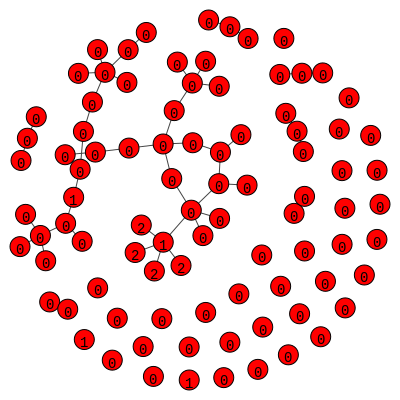

number of vertices of Graph Product 89
number of edges of Graph Product 48


In [ ]:
#this is wrong have to fix direct_product
product_graph = direct_product(G0,G1)
plot(product_graph,"product",(400,400))
print("number of vertices of Graph Product" , product_graph.vcount())
print("number of edges of Graph Product" , product_graph.ecount())

In [ ]:
#calculating Kernel Matrix of Graph according to contiguous label sequences


def cls_kernel_mat(graphs):
  N_gs = len(graphs)
  Kernel = np.zeros((N_gs,N_gs))
  for i,j in tqdm(combinations_with_replacement(range(N_gs),2)):
    graph_product = direct_product(graphs[i],graphs[j])
    E_gp = get_matpow(graph_product)
    K = E_gp.sum()
    Kernel[i][j] = Kernel[j][i] = K
  return Kernel  


In [ ]:
Kernel = cls_kernel_mat(Gs)
print(Kernel)

17766it [09:30, 31.12it/s]

[[256.51186115 181.03257049 181.44604317 ... 146.88008814 325.04677857
  216.68808038]
 [181.03257049 126.23850285 125.81807408 ... 106.62401703 229.01749332
  155.80130906]
 [181.44604317 125.81807408 126.51694879 ... 106.76817542 229.69423634
  156.16608397]
 ...
 [146.88008814 106.62401703 106.76817542 ...  88.54619538 184.85728064
  127.09010229]
 [325.04677857 229.01749332 229.69423634 ... 184.85728064 414.9980391
  275.09184868]
 [216.68808038 155.80130906 156.16608397 ... 127.09010229 275.09184868
  187.1780947 ]]


In [ ]:
n_splits = 5
avg_acc_score = use_k_fold(Kernel,labels,n_splits)
print("classification accuracy :" , avg_acc_score)

classification accuracy : 0.7557610241820768
